# Importing all necessary Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

from os import system
%matplotlib inline

# Read the data as dataframe

In [3]:
dataframe = pd.read_csv('bank-full.csv')

In [4]:
#Checking the first few columns
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#Checking the last few columns
dataframe.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Basic EDA

In [6]:
# Identifiying the shape of data
# Dataframe has 45211 rows & 17 columns
dataframe.shape

(45211, 17)

In [7]:
# Identifiying the type of attributes & null values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# identifying the data types
dataframe.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [9]:
# #The data types shown in object is actually catogorical data type the below code change the type to catogory
# dataframe['job'] = dataframe.Target.astype('category')
# dataframe['marital'] = dataframe.Target.astype('category')
# dataframe['education'] = dataframe.Target.astype('category')
# dataframe['default'] = dataframe.Target.astype('category')
# dataframe['housing'] = dataframe.Target.astype('category')
# dataframe['loan'] = dataframe.Target.astype('category')
# dataframe['contact'] = dataframe.Target.astype('category')
# dataframe['month'] = dataframe.Target.astype('category')
# dataframe['poutcome'] = dataframe.Target.astype('category')
# dataframe['Target'] = dataframe.Target.astype('category')
# dataframe.head()

In [39]:
# By analysis no null values have been found
dataframe.isnull().sum()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [11]:
# Give data

#Age         --- Numeric Values Non-null
#Job         --- Categorical values Non-null
#Marital     --- Categorical values Non-null
#Education   --- categorical values - unknown values present
#Default     --- categirical values, shows has credict in default, yes/no/unknown
#Balance     --- Numeric values - shows average yearly balance
#Housing     --- Categorical values, shows has housing loan ? yes/no/unknown
#Loan        --- Categorical values, shows has personal loan ? yes/no/unknown
#Contact     --- Categorical values, type of contact communication ? cellular/telepone
#Day         --- Numeric values, Last contact day of the month
#Month       --- Categorical values - Months
#Duration    --- Numerical values, Duration from last contact in seconds
#Campaign    --- Numeric values, no. of contact made during this campaign & for this client, also includes 
#Pdays       --- Numeric values, no of days passed by after the client was last contacted.
#Previous    --- Numeric values, no of contacts performed before this campaign
#Poutcome    --- Categorical values - outcomes of the previous marketting campaign unknown/success/failure
#Target      --- Categorical values - does the client subscribed a term deposit ? yes/no

In [38]:
# 5 point summery of the data
dataframe.describe().T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


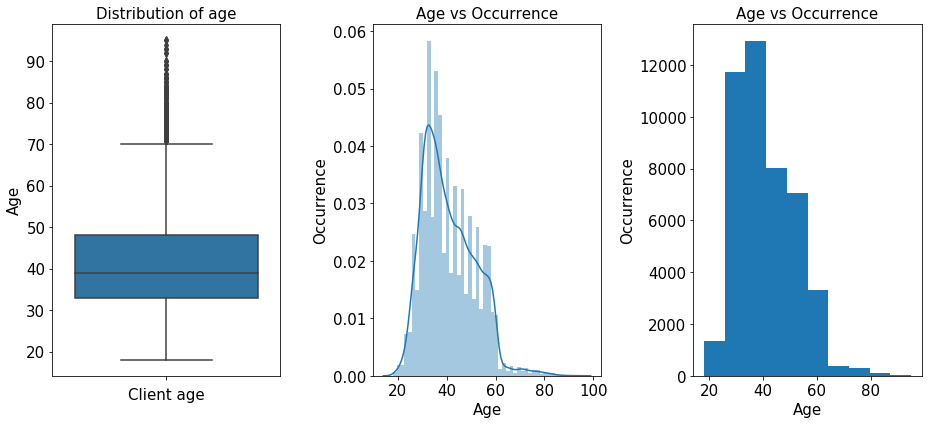

In [13]:
#Chceking up on age variable
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,6))

#boxplot
sns.boxplot(dataframe['age'],orient='v',ax=ax1)
ax1.set_xlabel('Client age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(dataframe['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(dataframe['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Age vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [14]:
#Chceking up on job variable
dataframe.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [15]:
dataframe.groupby('job').size()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

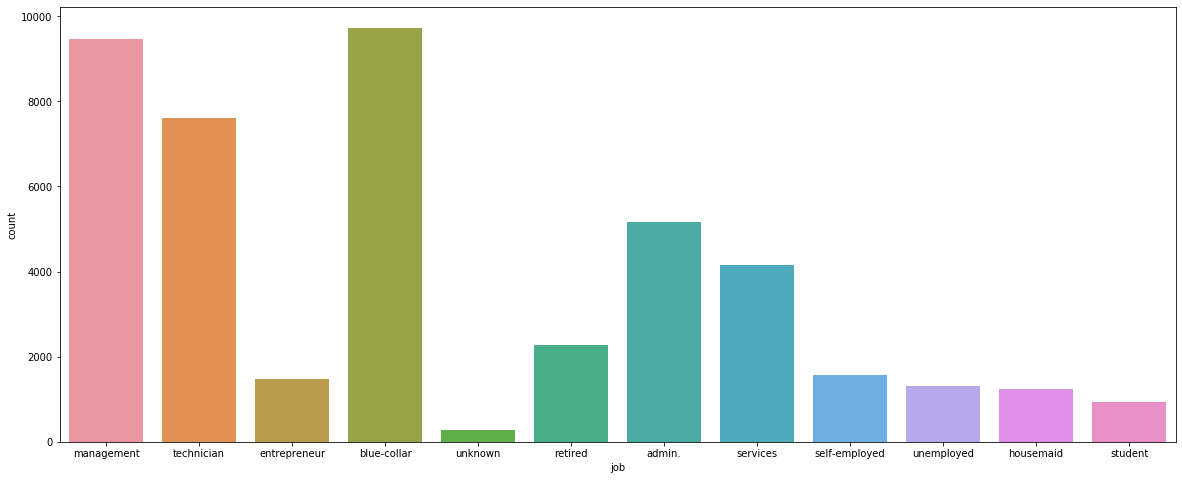

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

sns.countplot(dataframe['job'],data=dataframe)
ax1.set_xlabel('Job', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Job vs Count', fontsize=18)
ax1.tick_params(labelsize=20)

In [17]:
#Chceking up on marital variable
print("different catogories are : ",dataframe.marital.unique())
print("Grouping and couting :", dataframe.groupby('marital').size() )

different catogories are :  ['married' 'single' 'divorced']
Grouping and couting : marital
divorced     5207
married     27214
single      12790
dtype: int64


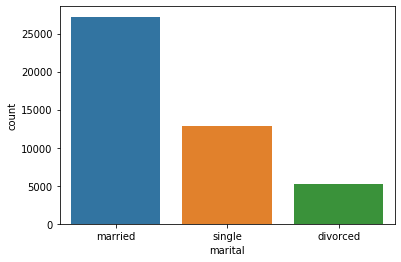

In [18]:
fig,ax1 = plt.subplots()
sns.countplot(dataframe['marital'])

In [19]:
#Chceking up on education variable
print("different catogories are : ",dataframe.education.unique())
print("Grouping and couting :", dataframe.groupby('education').size() )

different catogories are :  ['tertiary' 'secondary' 'unknown' 'primary']
Grouping and couting : education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64


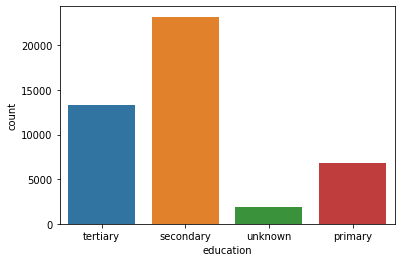

In [20]:
fig,ax1 = plt.subplots()
sns.countplot(dataframe['education'])

default categories ['no' 'yes']
Unique values defaut :  default
no     44396
yes      815
dtype: int64


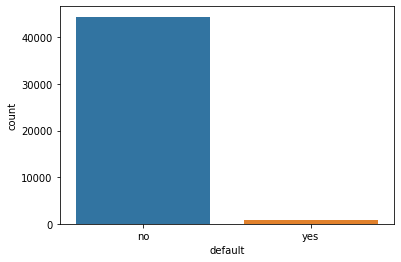

In [21]:
#Chceking up on default variable
print("default categories",dataframe['default'].unique())
print("Unique values defaut : ",dataframe.groupby('default').size())

fig,ax1 = plt.subplots()
sns.countplot(dataframe['default'])

In [22]:
# chceking upon balance variable
print("5 pint sumary for balance\n",dataframe['balance'].describe())
nullPresence = dataframe['balance'].isnull().any()

if(nullPresence):
    print('Null values are found with balances')
    print('Count for null values are : ',dataframe['balance'].isnull().sum())
else:
    print('No null values are found with balances')
    


5 pint sumary for balance
 count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64
No null values are found with balances


In [23]:
#detecting outliers with balance
Q1 = dataframe['balance'].quantile(q=0.25) #fist quartile
Q3 = dataframe['balance'].quantile(q=0.75) #third quartile
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Balance: ', L_outliers)
print('Upper outliers in Balance: ', U_outliers)

Lower outliers in Balance:  -1962.0
Upper outliers in Balance:  3462.0


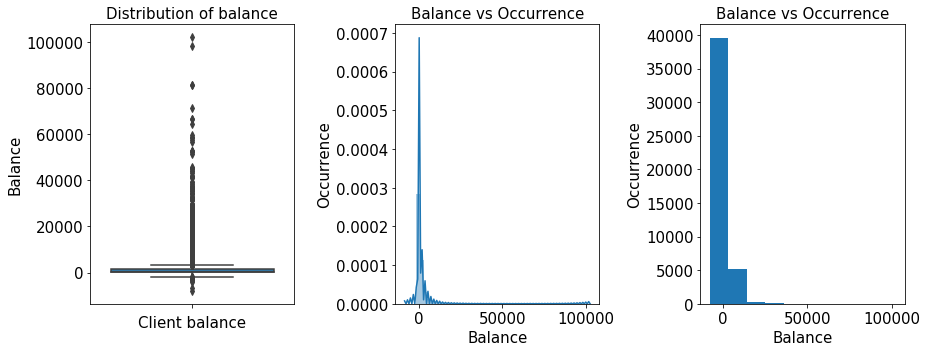

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='balance',data=dataframe,orient='v',ax=ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Distribution of balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(dataframe['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(dataframe['balance'])
ax3.set_xlabel('Balance', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Balance vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

#Found mean and median are different
# Data is right skewed, more data is present in the right tail

housing categories ['yes' 'no']
Unique values housing :  housing
no     20081
yes    25130
dtype: int64


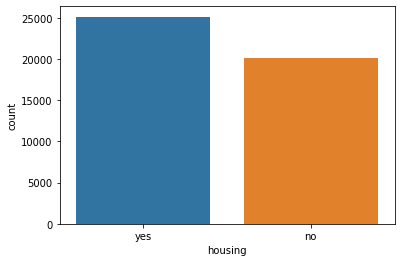

In [25]:
#Chceking up on housing variable
print("housing categories",dataframe['housing'].unique())
print("Unique values housing : ",dataframe.groupby('housing').size())

fig,ax1 = plt.subplots()
sns.countplot(dataframe['housing'])

loan categories ['no' 'yes']
Unique values loan :  loan
no     37967
yes     7244
dtype: int64


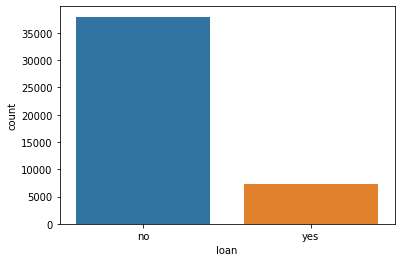

In [26]:
#Chceking up on loan variable
print("loan categories",dataframe['loan'].unique())
print("Unique values loan : ",dataframe.groupby('loan').size())

fig,ax1 = plt.subplots()
sns.countplot(dataframe['loan'])

contact categories ['unknown' 'cellular' 'telephone']
Unique values contact :  contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64


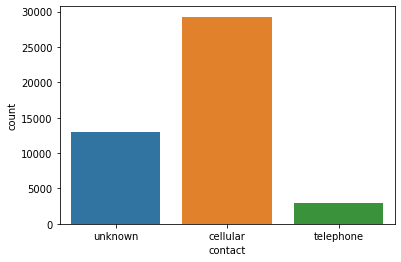

In [27]:
#Chceking up on contact variable
print("contact categories",dataframe['contact'].unique())
print("Unique values contact : ",dataframe.groupby('contact').size())

fig,ax1 = plt.subplots()
sns.countplot(dataframe['contact'])

In [28]:
#Chceking up on duration variable

print("5 pint sumary for duration\n",dataframe['duration'].describe())
nullPresence = dataframe['duration'].isnull().any()

if(nullPresence):
    print('Null values are found with duration')
    print('Count for null values are : ',dataframe['duration'].isnull().sum())
else:
    print('No null values are found with duration')

5 pint sumary for duration
 count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
No null values are found with duration


In [29]:
#detecting outliers with duration
Q1 = dataframe['duration'].quantile(q=0.25) #fist quartile
Q3 = dataframe['duration'].quantile(q=0.75) #third quartile
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in duration: ', L_outliers)
print('Upper outliers in duration: ', U_outliers)

Lower outliers in duration:  -221.0
Upper outliers in duration:  643.0


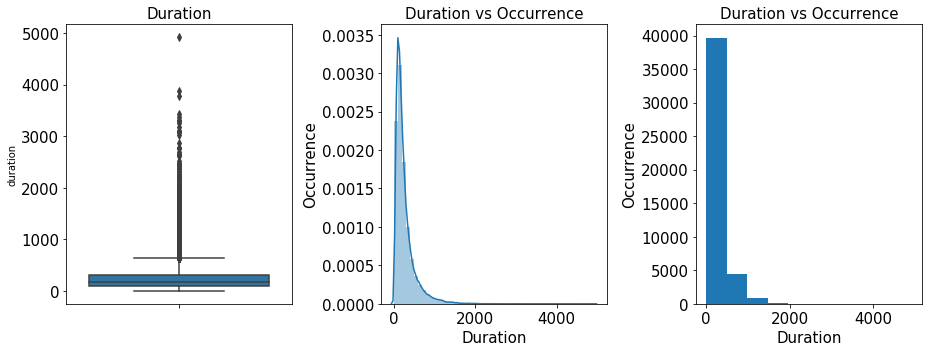

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='duration',data=dataframe,orient='v',ax=ax1)
ax1.set_title('Duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(dataframe['duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(dataframe['duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Duration vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
#Data is more right skewed

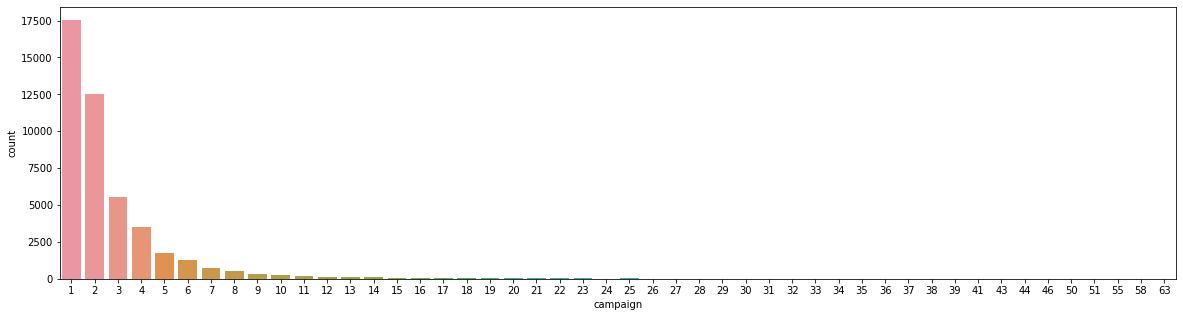

In [31]:
#Chceking up on campaign variable
# print("campaign categories",dataframe['campaign'].unique())
# print("Unique values campaign : ",dataframe.groupby('campaign').size())

fig, ax1=plt.subplots(1,1,figsize=(20,5))
sns.countplot(dataframe['campaign'])

# Observed the contact made is max 1 or 2 times

poutcome categories ['unknown' 'failure' 'other' 'success']
Unique values poutcome :  poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64


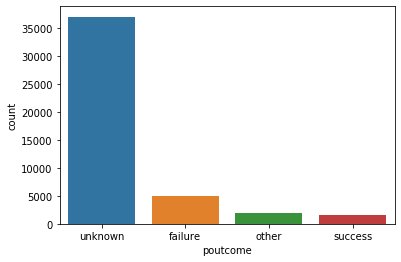

In [32]:
#Chceking up on poutcome variable
print("poutcome categories",dataframe['poutcome'].unique())
print("Unique values poutcome : ",dataframe.groupby('poutcome').size())

fig,ax1 = plt.subplots()
sns.countplot(dataframe['poutcome'])

target categories ['no' 'yes']
Unique values target :  Target
no     39922
yes     5289
dtype: int64


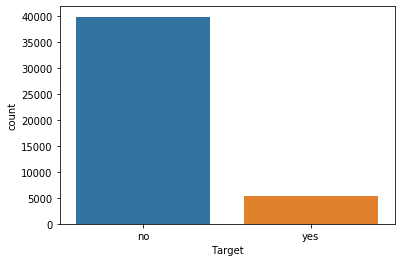

In [33]:
#Chceking up on target variable
print("target categories",dataframe['Target'].unique())
print("Unique values target : ",dataframe.groupby('Target').size())

fig,ax1 = plt.subplots()
sns.countplot(dataframe['Target'])

# Preparing the data

In [34]:
# Label encoding

labelencoder_X=LabelEncoder()
dataframe['job']=labelencoder_X.fit_transform(dataframe['job'])
dataframe['marital']=labelencoder_X.fit_transform(dataframe['marital'])
dataframe['education']=labelencoder_X.fit_transform(dataframe['education'])
dataframe['default']=labelencoder_X.fit_transform(dataframe['default'])
dataframe['housing']=labelencoder_X.fit_transform(dataframe['housing'])
dataframe['loan']=labelencoder_X.fit_transform(dataframe['loan'])
dataframe['contact']= labelencoder_X.fit_transform(dataframe['contact']) 
dataframe['month']= labelencoder_X.fit_transform(dataframe['month']) 
dataframe['poutcome'] = labelencoder_X.fit_transform(dataframe['poutcome'])
dataframe['Target'] = labelencoder_X.fit_transform(dataframe['Target'])


correlationCheck = dataframe.corr()
correlationCheck

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


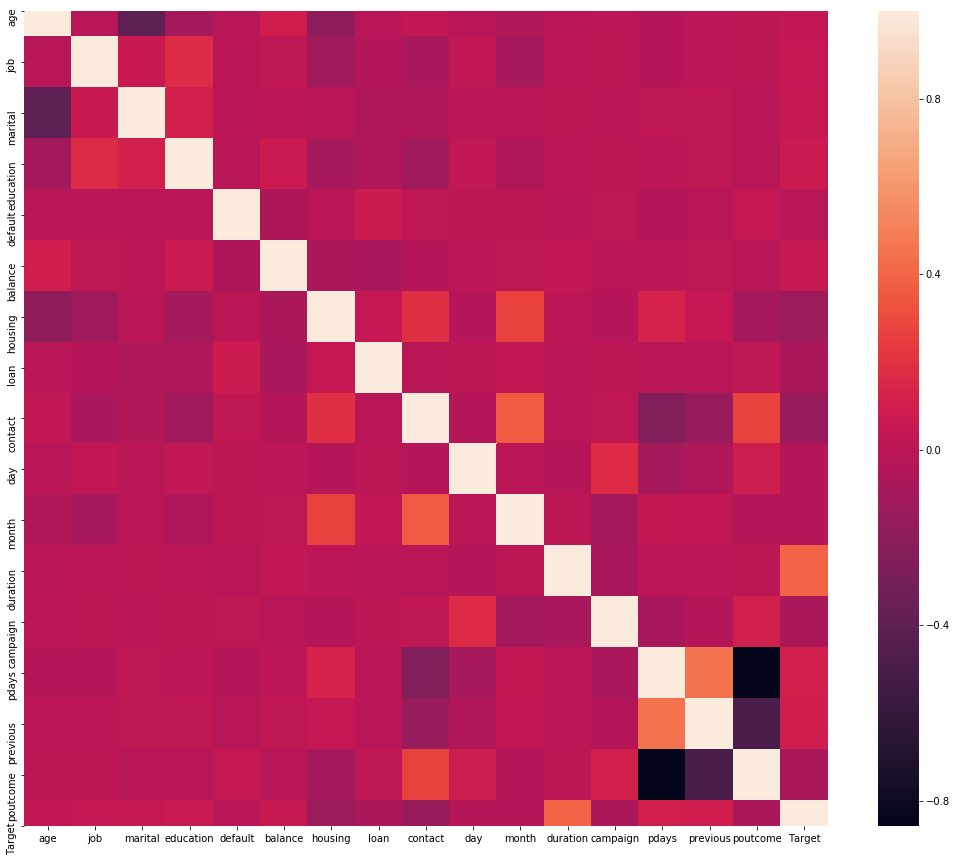

In [35]:
#plotting heat map
fig,htmap = plt.subplots(figsize = (18,15))
sns.heatmap(correlationCheck)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


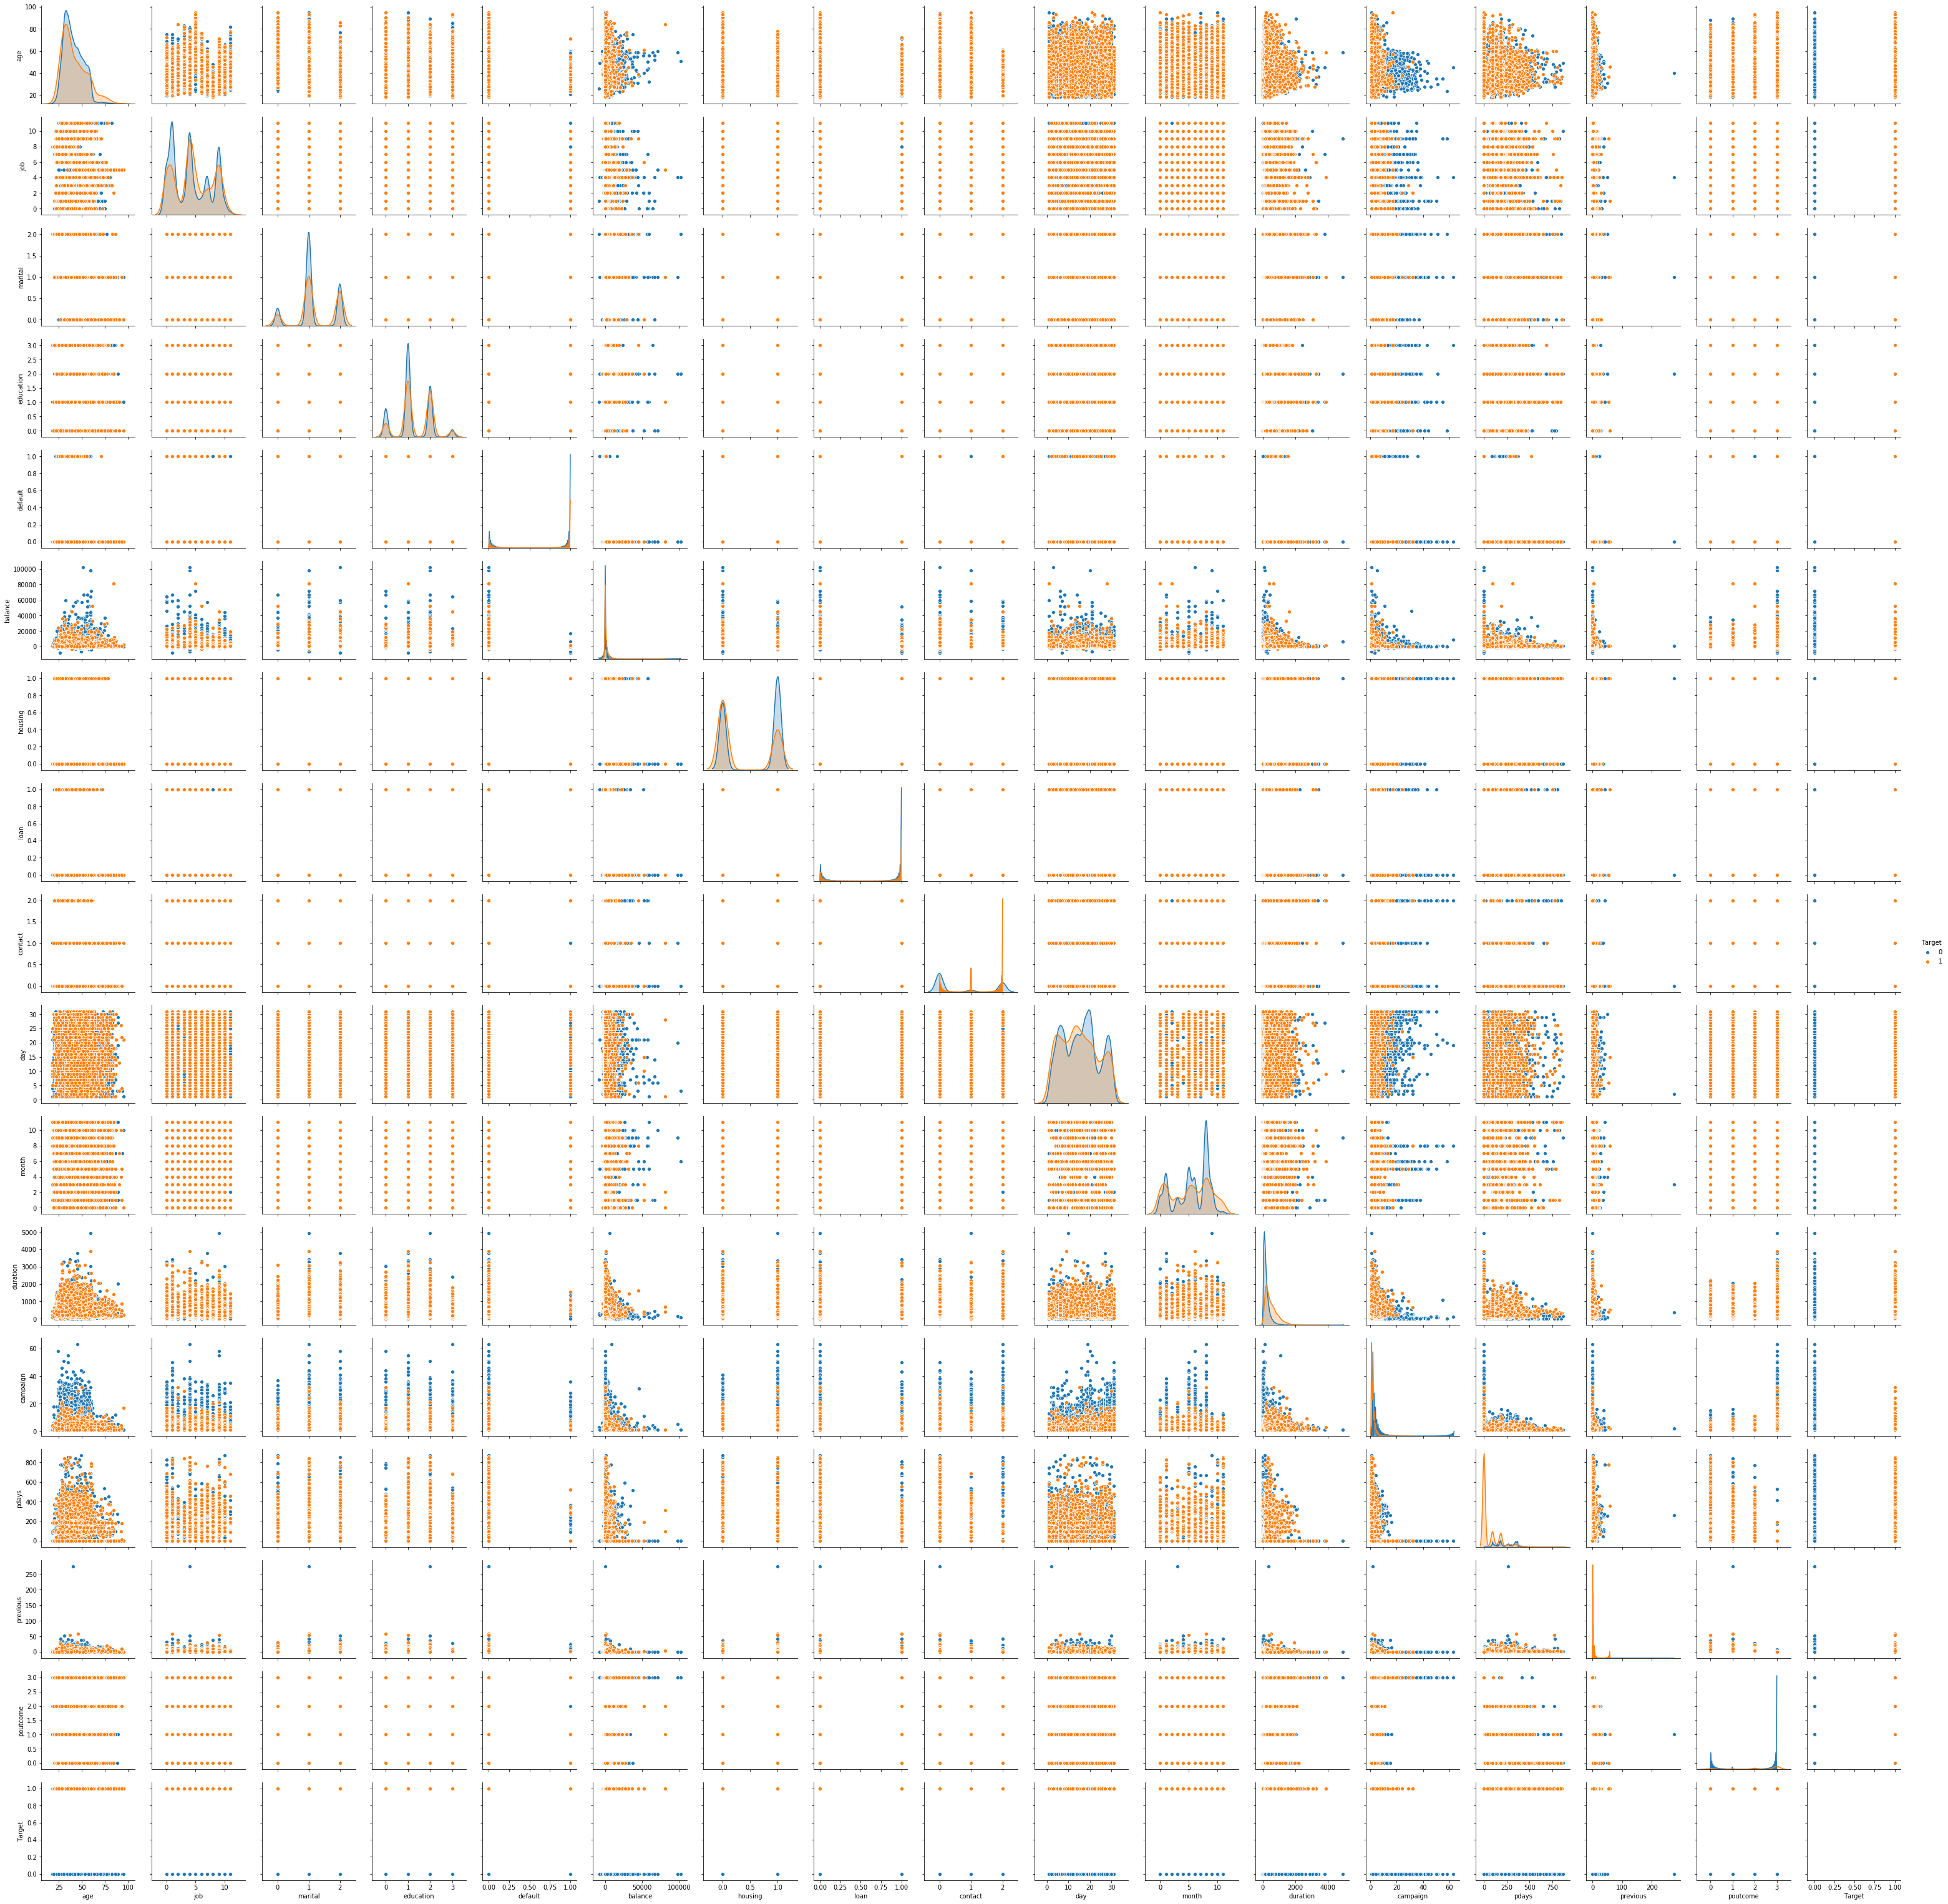

In [36]:
#Observing data from pairplot
sns.pairplot(dataframe,hue='Target')
plt.show()

In [36]:
#Splitting data as dependent & independent variable
X_data = dataframe.loc[:,dataframe.columns!='Target']
Y_data = dataframe.loc[:,dataframe.columns == 'Target']
Y_data

,Target
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [37]:
#Splitting the data from training & testing set
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=.3,random_state=0)
X_train = X_train.values

# Standard Classification Algorithms

# Logistic Regression

In [39]:
#Creating logistic regression prediction model
logisticModel = LogisticRegression()
logisticModel.fit(X_train,Y_train)
Logisticscore = logisticModel.score(X_test,Y_test)
logisticPredictTarget = logisticModel.predict(X_test)
print(Logisticscore)
print("Confusion matrix : ",metrics.confusion_matrix(Y_test, logisticPredictTarget))
print('\n')

#Summerizing the model
print(metrics.classification_report(Y_test, logisticPredictTarget))
# From the observation, the losgistic regression model gives an accuracy of 89%

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8880861102919493
Confusion matrix :  [[11709   260]
 [ 1258   337]]


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.56      0.21      0.31      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



# Naive Bayes Model

In [40]:
#Creating naive bias prediction model
#using the same data splitted as testing & training for the logistic regression

naiveModel = GaussianNB()
naiveModel.fit(X_train,Y_train)
naiveScore = naiveModel.score(X_test,Y_test)
naivePredict = naiveModel.predict(X_test)
print("Naive score is : ",naiveScore)
print("Confusion matrix is :",metrics.confusion_matrix(Y_test,naivePredict))

print("\n")
# Sumerizing the model
print(metrics.classification_report(Y_test,naivePredict))

## From the observation, the naive bayes model gives an accuracy of 84%

Naive score is :  0.8417133588911826
Confusion matrix is : [[10718  1251]
 [  896   699]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11969
           1       0.36      0.44      0.39      1595

    accuracy                           0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN Model

In [41]:
#Creating KNN prediction model
#using the same data splitted as testing & training for the logistic regression

modelKNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
modelKNN.fit(X_train,Y_train)
modelKNNscore = modelKNN.score(X_test,Y_test)
KNNpredict = modelKNN.predict(X_test)
print("KNN model score is  : ",modelKNNscore)
print("Confusion matrix is \n",metrics.confusion_matrix(Y_test,KNNpredict))
print("\n")

# Summerizing the model
print(metrics.classification_report(Y_test,KNNpredict))

## From the observation, the KNN model gives an accuracy of 87%

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNN model score is  :  0.8706133883810085
Confusion matrix is 
 [[11336   633]
 [ 1122   473]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11969
           1       0.43      0.30      0.35      1595

    accuracy                           0.87     13564
   macro avg       0.67      0.62      0.64     13564
weighted avg       0.85      0.87      0.86     13564



# SVM Model

In [42]:
#Creating SVM prediction model
svmModel = SVC(gamma = 'auto')
svmModel.fit(X_train,Y_train)
svmScore = svmModel.score(X_test,Y_test)
svmPredict = svmModel.predict(X_test)

print("SVM model score is : ",svmScore)
print("SMV model confusion matrix : ",metrics.confusion_matrix(Y_test,svmPredict))
print("\n")

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model score is :  0.8824093187850192
SMV model confusion matrix :
  [[11969     0]
 [ 1595     0]]




In [43]:
#Summerizing SVM model
print(metrics.classification_report(Y_test,svmPredict))
## From the observation, SVM model gives an accuracy of 88%

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Ensemble learning
# Decision Tree based model

In [44]:
# Building a decsiion tree model
#using the same data splitted as testing & training for the logistic regression

decisionModel = DecisionTreeClassifier(criterion='gini',random_state=1)
decisionModel.fit(X_train,Y_train)
treeScoretrain = decisionModel.score(X_train,Y_train)
treeScoretest = decisionModel.score(X_test,Y_test)
print("Tree score training : ",treeScoretrain)
print("Tree score testing : ",treeScoretest)

print("Overfitting is found with training data, found ok with testing data")

Tree score training :  1.0
Tree score testing :  0.8700973164258331
Overfitting is found with training data, found ok with testing data


In [45]:
#Visualizing decision tree
try:
    train_char_label = ['No', 'Yes']
    Bank_Tree_File = open('bank_tree.dot','w')
    dot_data = tree.export_graphviz(decisionModel, out_file=Bank_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
    Bank_Tree_File.close()
    
except Exception as e:
    print("Error : "+str(e))
    
    
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))
    
# Dosen't seems the system is supported

Error : Length of feature_names, 31647 does not match number of features, 16
system command returning error: 1


# Minimizing the depth to avoid overfitting

In [46]:
#Reducing over fitting

decisionModel = DecisionTreeClassifier(criterion='gini',max_depth = 10,random_state=1)
decisionModel.fit(X_train,Y_train)
treeScoretrain = decisionModel.score(X_train,Y_train)
treeScoretest = decisionModel.score(X_test,Y_test)
print("Tree score training : ",treeScoretrain)
print("Tree score testing : ",treeScoretest)

print("Max depth is set to 10 to avaoid train overfitting and the scores are improved")

Tree score training :  0.9318102821752456
Tree score testing :  0.8950162194043055
Max depth is set to 10 to avaoid train overfitting and the scores are improved


In [47]:
#Visualizing decision tree
try:
    train_char_label = ['No', 'Yes']
    Bank_Tree_File = open('bank_tree.dot','w')
    dot_data = tree.export_graphviz(decisionModel, out_file=Bank_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
    Bank_Tree_File.close()
    
except Exception as e:
    print("Error : "+str(e))

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))
    
# Dosen't seems the system is supported

Error : Length of feature_names, 31647 does not match number of features, 16
system command returning error: 1


In [92]:
# Printing the confusion matrix & model summary

decisionPredict = decisionModel.predict(X_test)
print("Confusion matrix is : \n",metrics.confusion_matrix(Y_test,decisionPredict))
print("Summery of the model : \n",metrics.classification_report(Y_test,decisionPredict))

Confusion matrix is : 
 [[11413   556]
 [  868   727]]
Summery of the model : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11969
           1       0.57      0.46      0.51      1595

    accuracy                           0.90     13564
   macro avg       0.75      0.70      0.72     13564
weighted avg       0.89      0.90      0.89     13564



# Bagging Model

In [54]:
# Ensemble learning Bagging
baggingModel = BaggingClassifier()
baggingModel.fit(X_train,Y_train)
baggingScore = baggingModel.score(X_test,Y_test)
baggingPrediction = baggingModel.predict(X_test)

print("The bagging model score is : ",baggingScore)
print("Confusion matrix : \n",metrics.confusion_matrix(Y_test,baggingPrediction))
# Summerizing the bagging model
print("\n",metrics.classification_report(Y_test,baggingPrediction))

# Here it is observed that the bagging model results an accuracy of 90%

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The bagging model score is :  0.8962695370097317
Confusion matrix : 
 [[11496   473]
 [  934   661]]

               precision    recall  f1-score   support

           0       0.92      0.96      0.94     11969
           1       0.58      0.41      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.75      0.69      0.71     13564
weighted avg       0.88      0.90      0.89     13564



# Ada boosting model

In [56]:
# Ensemble learning - AdaBoosting
adaboostModel = AdaBoostClassifier()
adaboostModel.fit(X_train,Y_train)
adaboostScore = adaboostModel.score(X_test,Y_test)
adaboostPrediction = adaboostModel.predict(X_test)

print("AdaBoost model score is : ",adaboostScore)
print("The confusion matrix is :\n",metrics.confusion_matrix(Y_test,adaboostPrediction))
# Sumerizing the Adaboost model
print(metrics.classification_report(Y_test,adaboostPrediction))


# Here it is observed that the AdaBoosting model results an accuracy of 89%

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost model score is :  0.8931731052786789
The confusion matrix is :
 [[11586   383]
 [ 1066   529]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.58      0.33      0.42      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564



# Gradient Boosting

In [65]:
# Ensemble learning - GradientBoosting
gradientModel = GradientBoostingClassifier()
gradientModel.fit(X_train,Y_train)
gradientScore = gradientModel.score(X_test,Y_test)
gradientPredict = gradientModel.predict(X_test)

print("The model score is : ",gradientScore)
print("Confusion matrix is : \n",metrics.confusion_matrix(Y_test,gradientPredict))
print("The model summery is :\n",metrics.classification_report(Y_test,gradientPredict))

# Here it is observed that the GradientBoosting model results an accuracy of 90%

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The model score is :  0.9016514302565615
Confusion matrix is : 
 [[11603   366]
 [  968   627]]
The model summery is :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.63      0.39      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



# Random forest

In [77]:
# Ensemble learning - RandomForest

randomforestModel = RandomForestClassifier()
randomforestModel.fit(X_train,Y_train)
randomforestScore = randomforestModel.score(X_test,Y_test)
randomForestPrediction = randomforestModel.predict(X_test)

print("The Random forest model score is : ",randomforestScore)
print("Printing the confusion matrix : \n",metrics.confusion_matrix(Y_test,randomForestPrediction))
print("\nThe model sumery as below : \n",metrics.classification_report(Y_test,randomForestPrediction))

# Here it is observed that the RandomForest model results an accuracy of 90%

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The Random forest model score is :  0.8972279563550575
Printing the confusion matrix : 
 [[11586   383]
 [ 1011   584]]

The model sumery as below : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.60      0.37      0.46      1595

    accuracy                           0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



# Comparing performance of all models

In [87]:
# Logistic Regression
print(Logisticscore)
print("Confusion matrix : ",metrics.confusion_matrix(Y_test, logisticPredictTarget))

0.8880861102919493
Confusion matrix :  [[11709   260]
 [ 1258   337]]


In [88]:
# Naive Bayes
print("Naive score is : ",naiveScore)
print("Confusion matrix is :",metrics.confusion_matrix(Y_test,naivePredict))

Naive score is :  0.8417133588911826
Confusion matrix is : [[10718  1251]
 [  896   699]]


In [89]:
# KNN
print("KNN model score is  : ",modelKNNscore)
print("Confusion matrix is \n",metrics.confusion_matrix(Y_test,KNNpredict))

KNN model score is  :  0.8706133883810085
Confusion matrix is 
 [[11336   633]
 [ 1122   473]]


In [91]:
# SVM
print("SVM model score is : ",svmScore)
print("SMV model confusion matrix :\n ",metrics.confusion_matrix(Y_test,svmPredict))

SVM model score is :  0.8824093187850192
SMV model confusion matrix :
  [[11969     0]
 [ 1595     0]]


In [96]:
# Ensemble Models
# Decision Tree
print("Tree score training : ",treeScoretrain)
print("Tree score testing : ",treeScoretest)
print("Confusion matrix is : \n",metrics.confusion_matrix(Y_test,decisionPredict))

Tree score training :  0.9318102821752456
Tree score testing :  0.8950162194043055
Confusion matrix is : 
 [[11413   556]
 [  868   727]]


In [97]:
# Bagging
print("The bagging model score is : ",baggingScore)
print("Confusion matrix : \n",metrics.confusion_matrix(Y_test,baggingPrediction))

The bagging model score is :  0.8962695370097317
Confusion matrix : 
 [[11496   473]
 [  934   661]]


In [99]:
# Adaboosting
print("AdaBoost model score is : ",adaboostScore)
print("The confusion matrix is :\n",metrics.confusion_matrix(Y_test,adaboostPrediction))

AdaBoost model score is :  0.8931731052786789
The confusion matrix is :
 [[11586   383]
 [ 1066   529]]


In [100]:
# Gradient boosting

print("The model score is : ",gradientScore)
print("Confusion matrix is : \n",metrics.confusion_matrix(Y_test,gradientPredict))

The model score is :  0.9016514302565615
Confusion matrix is : 
 [[11603   366]
 [  968   627]]


In [101]:
# Random forest
print("The Random forest model score is : ",randomforestScore)
print("Printing the confusion matrix : \n",metrics.confusion_matrix(Y_test,randomForestPrediction))

The Random forest model score is :  0.8972279563550575
Printing the confusion matrix : 
 [[11586   383]
 [ 1011   584]]


# Observations

* Almost all the ensemble models gives an accuracy of 90%
* When compared to Logistic regression,KNN, Naive bayes, The ensemble learing gave more accurate models
* Overall the ensemble models gradient boosting gave a slight more accuracy